# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## This notebook was last tested with IPython notebook 4.1.0 using Python 2.7
### (If you have trouble running this notebook, please check version compatibility)

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from ipywidgets import interact, interact_manual, fixed
from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Mid)

available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, Bands.Mid5C,
                   Bands.Sur1)

# The High Priority Science Objective list below includes the HPSOs that were originally intended for 
# The Survey telescope. These have since been reassigned to Mid.
available_hpsos = [HPSOs.hpso_max_Low_c, HPSOs.hpso_max_Low_s, HPSOs.hpso_max_Mid_c, HPSOs.hpso_max_Mid_s, 
                   HPSOs.hpso_max_band5_Mid_c, HPSOs.hpso_max_band5_Mid_s, 
                   HPSOs.hpso01c, HPSOs.hpso01s, HPSOs.hpso02A, HPSOs.hpso02B, HPSOs.hpso14, HPSOs.hpso14c, HPSOs.hpso14s, 
                   HPSOs.hpso22, HPSOs.hpso37a, HPSOs.hpso37b, HPSOs.hpso38a, HPSOs.hpso38b, 
                   HPSOs.hpso13c, HPSOs.hpso13s, HPSOs.hpso15c, HPSOs.hpso15s, 
                   HPSOs.hpso27, HPSOs.hpso33, HPSOs.hpso37c]

available_hpsos.sort()

available_modes     = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg)
available_modes_all = available_modes + (ImagingModes.All,)
verbose_display = False

## Using default values, we can compare telescopes side-by-side

Image Characteristics:
----------------------

Facet FOV:  0.00909456817667973*(5.42847785319555*sign(N_facet - 1) + 27.1423892659778)/N_facet  rads
PSF size:   5.59048872933426e-5  rads
Pixel size: 1.86349624311142e-5  rads
No. pixels on facet side: 488.037913159128*(5.42847785319555*sign(N_facet - 1) + 27.1423892659778)/N_facet
Epsilon approx : 0.342997170285018
Found Qbw =    4.286, and cell frac error, epsilon,     0.343
Max subband ratio 1.35
Subband Freq ratio used: 1.32046924776
Number subbands use in imaging 7.0
Maximum baseline 80000
Station (or antenna) diameter 35
Number of stations (or antennas) 512

---------------------

Channelization Characteristics:
-------------------------------

Ionospheric timescale (for updating kernels and limiting any time averaging):  10.0  sec
Coalesce Time predict:  Min(1.2, 0.9*Max(1.0, floor(72539.9097466661/Bmax,bin)))  sec
Coalesce Time backward:  Min(10.0, 0.9*N_facet*Max(1.0, floor(72539.9097466661/Bmax,bin))/(0.2*sign(N_facet - 1) + 1)

Telescope,SKA1_Low_rebaselined,SKA1_Mid_rebaselined,
Band,Low,Mid1,
Mode,Fast Imaging,Fast Imaging,
Baseline Dependent Time Avg.,True,True,
Max Baseline,80000,150000,m
Max # channels,65536,65536,
Optimal Number of Facets,1,3,
Optimal Snapshot Time,1.0,1.0,sec.
Image side length,13246,25671,pixels
Visibility Buffer,0.000373,0.000723,PetaBytes
Working (cache) memory,0.466,36.9,TeraBytes


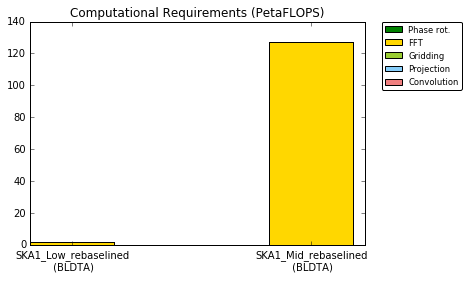

In [2]:
interact_manual(iapi.compare_telescopes_default, 
                telescope_1=available_teles, telescope_2=available_teles, band_1=available_bands,
                band_2=available_bands, mode_1=available_modes_all, mode_2=available_modes_all,
                verbose=verbose_display);

## Using default values, can compute results for the High Priority Science Objectives

In [2]:
interact_manual(iapi.evaluate_hpso_optimized, hpso_key=available_hpsos, verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [ ]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=available_teles, band=available_bands, mode=available_modes_all, verbose=verbose_display);

### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

In [ ]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000), Nf_max = (1,256000,1), telescope=available_teles, 
         band=available_bands, mode=available_modes_all, verbose=verbose_display);

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter Bmax, evaluating expression Rflop over range (30000, 150000) in 10 steps (i.e. 11 data points)
using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
> 0.0% done: Evaluating Rflop for Bmax = 30000
> 9.1% done: Evaluating Rflop for Bmax = 42000
> 18.2% done: Evaluating Rflop for Bmax = 54000
> 27.3% done: Evaluating Rflop for Bmax = 66000
> 36.4% done: Evaluating Rflop for Bmax = 78000
> 45.5% done: Evaluating Rflop for Bmax = 90000
> 54.5% done: Evaluating Rflop for Bmax = 102000
> 63.6% done: Evaluating Rflop for Bmax = 114000
> 72.7% done: Evaluating Rflop for Bmax = 126000
> 81.8% done: Evaluating Rflop for Bmax = 138000
> 90.9% done: Evaluating Rflop for Bmax = 150000
done with parameter sweep!


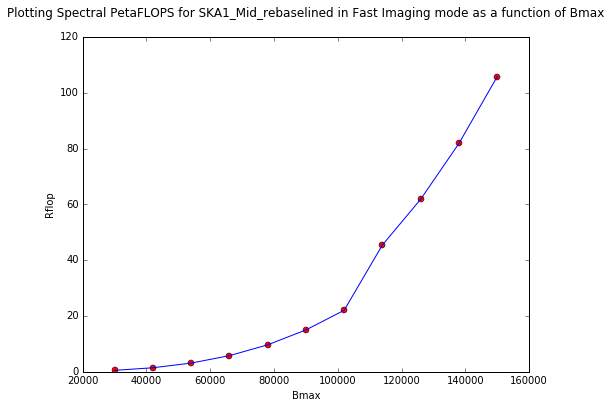

30000.0 , 0.520447651131
42000.0 , 1.44619412305
54000.0 , 3.12071117767
66000.0 , 5.77874546931
78000.0 , 9.65845619023
90000.0 , 15.000357222
102000.0 , 22.050549863
114000.0 , 45.4477822008
126000.0 , 61.8475539098
138000.0 , 81.8454297872
150000.0 , 105.792592726


In [4]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Bmax'
param_val_min =30000
param_val_max = 150000
number_steps = 10
telescope = Telescopes.SKA1_Mid
immode = ImagingModes.FastImg
band=Bands.Mid5C

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(param_values, results) = iapi.eval_param_sweep_1d(telescope, immode, band=band, 
                                                   expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=False)
header = 'Plotting Spectral PetaFLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

for i in range(len(param_values)):
               print param_values[i], ",", (results[i])/c.peta

## illustrating 2D "parameter sweep" + visualization functionality.

In [ ]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Mid
band = Bands.Mid1
immode = ImagingModes.FastImg
expression = 'Rflop'
parameters = ('Bmax', 'Tobs')
parameter_ranges = ((30000,150000),(0.15,2.0))
number_steps = 4
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(telescope, immode, band=band, 
                                                           expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))
print results/1e15

Evaluating expression Rflop while
sweeping parameters Bmax and Tobs over 2D domain [30000, 150000] x [0.15, 2.0] in 4 steps each,
for a total of 25 data evaluation points
> 0.0% done: Evaluating Rflop for (Bmax, Tobs) = (30000.0, 0.15)
> 4.0% done: Evaluating Rflop for (Bmax, Tobs) = (30000.0, 0.6125)
> 8.0% done: Evaluating Rflop for (Bmax, Tobs) = (30000.0, 1.075)
> 12.0% done: Evaluating Rflop for (Bmax, Tobs) = (30000.0, 1.5375)
> 16.0% done: Evaluating Rflop for (Bmax, Tobs) = (30000.0, 2.0)
> 20.0% done: Evaluating Rflop for (Bmax, Tobs) = (60000.0, 0.15)
> 24.0% done: Evaluating Rflop for (Bmax, Tobs) = (60000.0, 0.6125)
> 28.0% done: Evaluating Rflop for (Bmax, Tobs) = (60000.0, 1.075)
> 32.0% done: Evaluating Rflop for (Bmax, Tobs) = (60000.0, 1.5375)
> 36.0% done: Evaluating Rflop for (Bmax, Tobs) = (60000.0, 2.0)
> 40.0% done: Evaluating Rflop for (Bmax, Tobs) = (90000.0, 0.15)

In [3]:
print results/1e15

[[  40.13265587  254.19929784]
 [   5.51404566   50.92312652]]
